# The influence of promotions on the sales of a supermarket 

Authors : Jarod Vanderlynden , Philippe Mathieu, [CRISTAL Lab](http://www.cristal.univ-lille.fr), [SMAC team](https://www.cristal.univ-lille.fr/?rubrique27&eid=17), [Lille University](http://www.univ-lille.fr), Romain Warlop, [fifty-five](https://www.fifty-five.com/fr/)

email : jarod.vanderlynden.etu@univ-lille.fr

Created : 30/01/2023


***
## Introduction

In this jupyter notebook we reproduce most of the results of the experiments in the article _"Understanding the impact of pricing strategies on consumer behavior"_.

The presentation of the model is done in the part _Get\_Started_ 

***

### The increase in sales volume

An experimentation represents 20 simulations, we carry out an experimentation without promotion and one with promotion, on an ABM containing the same agents and the same packs. 

In [1]:
from src.model import *
import seaborn as sns
sns.set_theme()

In [2]:
# Figure1 : a classical experiment without promotion
# Running this cell can take a long time (several minutes)
drevenues = {}
dproducts = {}
for i in range(20):
    print(i,end=" ")
    np.random.seed(0) # Random seed set for the generation of packs and agents to have the same on all simulations.
    test = generate_pack_categorie("bananas") # Creation of the category of packs
    abm = SMA([test],300,100)
    abm.initialize()
    np.random.seed(int(10000 * time.time()) % 2**32) # We reintegrate randomness before launching the simulation.
    abm.run()
    drevenues[i] = abm.revenues
    j=0
    for pack in abm.packs_categories[0].pack_list:  # This line only works with one category. 
        if not j in dproducts.keys():
            dproducts[j] = {}
        dproducts[j][i] = abm.cumulative_nb_bought_per_pack[pack.name]
        j+=1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

In [3]:
#Figure2 : the same experiment, but with a 40% price promotion on the product 0
# Running this cell may take some time (several minutes)
drevenues2 = {}
dproducts2 = {}
for i in range(20):
    print(i,end=" ")
    np.random.seed(0)
    test = generate_pack_categorie("bananas") # Creation of the category of packs
    abm2 = SMA([test],300,100)
    abm2.initialize()
    abm2.makePromo(0,40,(30,34),"bananas","bananas0")
    np.random.seed(int(10000 * time.time()) % 2**32)
    abm2.run()
    drevenues2[i] = abm.revenues
    j=0
    for pack in abm2.packs_categories[0].pack_list:  # This line only works with one category. 
        if not j in dproducts2.keys():
            dproducts2[j] = {}
        dproducts2[j][i] = abm2.cumulative_nb_bought_per_pack[pack.name]
        j+=1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

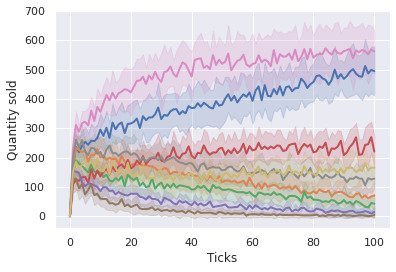

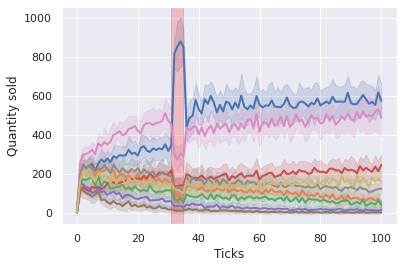

In [4]:
# Code needed to cumulate the simulations to draw the curves

for key in dproducts.keys():
    df = pd.DataFrame(data = dproducts[key])
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    new_color =  plt.plot(df.index , df.moy, linewidth=2, linestyle='-',
    label='exp')[0].get_color()
    plt.fill_between(df.index,df.moy-(df.ecart), df.moy+(df.ecart),
    color=new_color, alpha=0.2)
plt.ylabel("Quantity sold")
plt.xlabel("Ticks")
#plt.savefig("NbAcheteurs0.svg",bbox_inches='tight')
plt.show()


for key in dproducts2.keys():
    df = pd.DataFrame(data = dproducts2[key])
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    new_color = plt.plot(df.index , df.moy, linewidth=2, linestyle='-',
    label='exp')[0].get_color()
    plt.fill_between(df.index,df.moy-(df.ecart), df.moy+(df.ecart),
    color=new_color, alpha=0.2)
plt.ylabel("Quantity sold")
plt.xlabel("Ticks")
plt.axvspan(31, 35, alpha=0.2, color='red')
# plt.savefig("NbAcheteurs1.svg",bbox_inches='tight')
# plt.savefig("VolumeDesVentes.svg")

In this figure, for a 40% price reduction, we observe on average a 50% increase in the volume of sales on the promoted product.

### Impact of repeated promotions

We propose to perform 3 experiments (20 simulations each).

-Without promotion

-With 5 successive promotions at 20% off

-With 5 successive promotions at 50% off

In [5]:
# Definition of a function that will be used to display our results.
def my_plot(df):
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    plt.plot(df.index ,df.moy)
    plt.fill_between(df.index ,df.moy-(df.ecart), df.moy+(df.ecart),alpha=0.2)
    return 0

In [6]:
# Data recovered during the simulations.
# Running this cell may take some time (several minutes).
dfmeanPrice1 = pd.DataFrame()
dfmeanPrice2 = pd.DataFrame()
dfmeanPrice3 = pd.DataFrame()
# Number of experiments to be performed 
for i in range(20):
    print(i, end=' ')
    
    # Creation of ABMs
    np.random.seed(3)
    test = generate_pack_categorie("bananas") # Creation of the category of packs
    abm1 = SMA([test],300,100)
    abm1.initialize()
    abm2 = SMA([test],300,100)
    abm2.initialize()
    abm3 = SMA([test],300,100)
    abm3.initialize()

    # Promotions
    abm2.makePromo(0,20,(10,14),"bananas","bananas0")
    abm2.makePromo(0,20,(20,24),"bananas","bananas0")
    abm2.makePromo(0,20,(30,34),"bananas","bananas0")
    abm2.makePromo(0,20,(40,44),"bananas","bananas0")
    abm2.makePromo(0,20,(50,54),"bananas","bananas0")

    abm3.makePromo(0,50,(10,14),"bananas","bananas0")
    abm3.makePromo(0,50,(20,24),"bananas","bananas0")
    abm3.makePromo(0,50,(30,34),"bananas","bananas0")
    abm3.makePromo(0,50,(40,44),"bananas","bananas0")
    abm3.makePromo(0,50,(50,54),"bananas","bananas0")

    # Simulations
    np.random.seed(int(10000 * time.time()) % 2**32)
    abm1.run()
    abm2.run()
    abm3.run()
    
    # Save the results
    for cat in abm1.packs_categories:
        dfmeanPrice1.insert(i,cat.name+str(i),abm1.getMeanNeeds()[cat.name])
        dfmeanPrice2.insert(i,cat.name+str(i),abm2.getMeanNeeds()[cat.name])
        dfmeanPrice3.insert(i,cat.name+str(i),abm3.getMeanNeeds()[cat.name])

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

[]

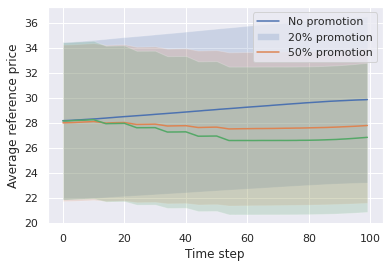

In [29]:
# Code needed for display
# As we have only one category the display is simpler
my_plot(dfmeanPrice1)
my_plot(dfmeanPrice2)
my_plot(dfmeanPrice3)
plt.legend(["No promotion","20% promotion","50% promotion"])
plt.ylabel("Average reference price")
plt.xlabel("Time step")
# plt.savefig("PrixRefMoyen.svg",bbox_inches='tight')
plt.plot()

It can be observed that during different promotions, there is a reduction in the reference price of the agents. It can be concluded that the average perception of products changes because of the promotion. Agents are more attracted to low cost products after a promotion. 

### Acquisition and retention of new customers

This simulation shows that in this model, promotion enables the acquisition of new customers via an increase in the number of sales and buyers, but the promotion also enables the retention of a part of these customers. 

In [8]:
np.random.seed(3)
test = generate_pack_categorie("bananas")
abm = SMA([test],300,100)
abm.initialize()
abm.makePromo(0,40,(30,34),"bananas","bananas0")
abm.run()

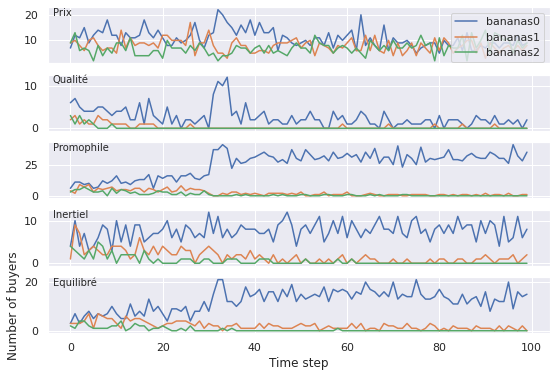

In [9]:
abm.showProfileSales()

The promotion starts at time step 30 and ends at time step 34. We observe that promophile agents are more impacted by the promotion than other agents. Moreover, we observe a loyalty (long term increase of the number of buyers when there is no more promotion) on some profiles, especially on the promophile profiles. 

### Price war

We generate 2 quite similar products, one focused on quality, the other on price. We can also imagine two very different products in terms of price/quality or 2 even more similar products. These characteristics will have an impact on the curves we will observe. The goal here is to present a price war, with successive decreases in the price of the products. 

First, the method `ABM.get_favorites()` allows us to retrieve for each product the number of agents having this product as a favorite at each time step. An agent's favorite product is the one he bought the most over the sliding history.



In [10]:
# On fait la simulation
cat_0 = Category("category0",[Pack("packA", 10, 0.5, 1), Pack("packB", 12, 0.7, 1)])
abmWithPriceWar = SMA([cat_0],300,10)
abmWithPriceWar.initialize()
abmWithPriceWar.run()
#On récupère les informations
results = abmWithPriceWar.getFavorites()
results

{'packA': [158, 157, 163, 154, 158, 161, 152, 150, 156, 159],
 'packB': [142, 143, 137, 146, 142, 139, 148, 150, 144, 141]}

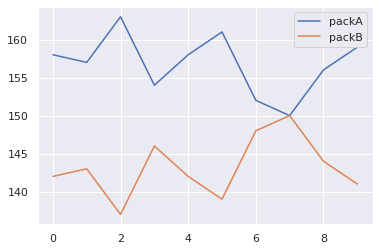

In [11]:
plt.plot(results['packA'],label='packA')
plt.plot(results['packB'],label='packB')
plt.legend()

We observe that pack B is slightly better than pack A on our population of 300 agents spread over the 5 profiles.

Explanation:
There are 5 profiles: price, quality, promophiles, inertials,balanced.
There is no promotion, which reduces the promophiles to balanced, so 2/5th of the agents are more interested in product B since the quality-price ratio is better for B: $ 0.5/10 > 0.7/12$. The quality profiles will prefer to take the better quality products (i.e. B). Only the price agents will be interested in product A because it is cheaper.

Let's perform a new experiment on 100 time steps with fixed random seed (for comparison).

In [12]:
np.random.seed(42)
cat_0 = Category("category0",[Pack("packA", 100, 0.5, 1), Pack("packB", 120, 0.6, 1)])
abmPriceWar = SMA([cat_0],300,100)
abmPriceWar.initialize()
abmPriceWar.run()
# We save the information
turnover = abmPriceWar.revenues
favorites = abmPriceWar.getFavorites()

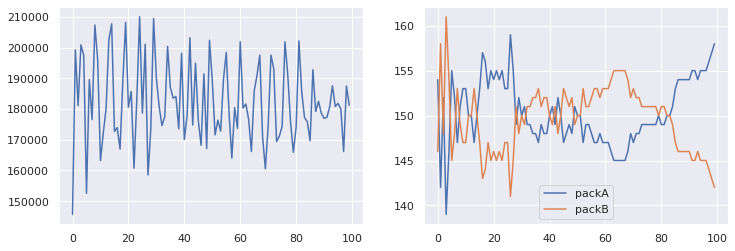

In [13]:
fig,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(turnover)
for k in favorites.keys():
    axs[1].plot(favorites[k],label=k)
axs[1].legend()

The quality/price ratios of the products are similar (0.5/100 = 0.6/120). We observe that neither of the two products stands out, they have an equivalent market share and are in direct competition. Moreover, they are very similar products, if one of the products makes a promotion (temporary) or changes its price (definitive until the next possible change) it absorbs a considerable part of the market share of its competitor. 

This is shown in a simulation with a price decrease of product A only.

A final price change, which is not a promotion, is done with the method `reducePrice(percentage, effect tick, product)` or `raisePrice(percentage, effect tick, product)`. This gives for example `reducePrice(20, 30, 0, 0)`.

In [14]:
np.random.seed(42)
cat_0 = Category("category0",[Pack("packA", 100, 0.5, 1), Pack("packB", 120, 0.6, 1)])
abmPriceWar = SMA([cat_0],300,100)
abmPriceWar.initialize()
# We indicate when the price drop takes place
abmPriceWar.reducePrice(40, 30, 0, 0)
abmPriceWar.run()
# We save the information
turnover = abmPriceWar.revenues
favorites = abmPriceWar.getFavorites()

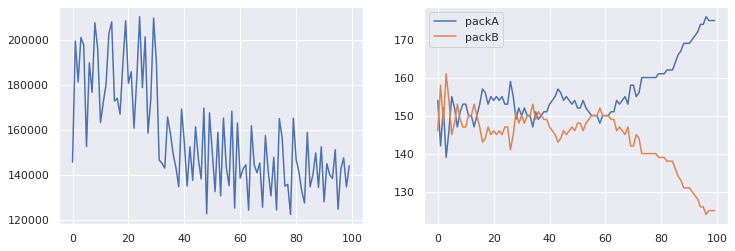

In [15]:
fig,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(turnover)
for k in favorites.keys():
    axs[1].plot(favorites[k],label=k)
axs[1].legend()

We observe an increase in market share of 33% for product A and a decrease of 33% for product B. The products that had equivalent market shares now have respectively 2/3 and 1/3 of the market shares. 

Finally, a simulation is carried out which illustrates the _price war_, i.e. the price of product B falls, which leads to a fall in the price of product A, which in turn leads to a fall in the price of product B, etc. 
In such a situation all packs are "losers". This can be seen in the drop in the revenues.

In [16]:
np.random.seed(42)
cat_0 = Category("category0",[Pack("packA", 100, 0.5, 1), Pack("packB", 120, 0.6, 1)])
abmPriceWar = SMA([cat_0],300,100)
abmPriceWar.initialize()
# We indicate when price drops takes place
abmPriceWar.reducePrice(20, 10, 0, 0)
abmPriceWar.reducePrice(20, 20, 0, 1)
abmPriceWar.reducePrice(20, 30, 0, 0)
abmPriceWar.reducePrice(20, 40, 0, 1)
# abmPriceWar.reducePrice(20, 50, 0, 1)
# abmPriceWar.reducePrice(20, 60, 0, 1)
abmPriceWar.run()
# We save the information
turnover = abmPriceWar.revenues
favorites = abmPriceWar.getFavorites()

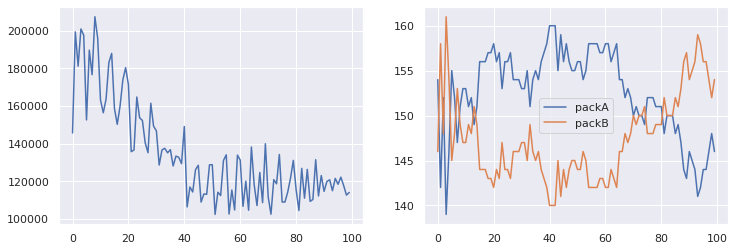

In [17]:
fig,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(turnover)
for k in favorites.keys():
    axs[1].plot(favorites[k],label=k)
axs[1].legend()

## Model parameters
The model has 7 parameters: price, quality, promophile, sat_alpha, phi, c and inertia. 
These parameters are all optional parameters that can be modified via the `initialize()` method. By default their value is fixed. 

`Price, quality, promophile, inertia` are the parameters that manage the overall importance for all agents of price, quality, promotion and inertia. These parameters vary according to the type of store. For example, is it a discount store where prices are rather low (the price parameter will be high) or a luxury store where price does not matter (the price parameter will be low). 

For example, a price of 1 with all other values at 0 would mean that the agents all take only the price of the products into account in determining their purchases. The price at 1 and the inertia at 10 would mean that all agents are very inertial and give little importance to the price. We can imagine all type of different situations.  

`sat_alpha` is the parameter for regulating the slope of the saturation function (used in the calculation of the quantity). The higher it is, the smoother the slope and vice versa. 

`C` is the upper bound of this saturation function.

The saturation function is used in the calculation of the number of packs that the agent buys. Agents assign scores according to a utility function. These scores allow the agents to choose the product they will buy. Finally, the product that has been chosen is compared to a reference product unique for each agent. The difference is reported in the saturation function which modulates the quantity of packs purchased. This function means that the more interesting the pack is (according to the agent's characteristics) compared to what he is used to buying, the more the agent buys a large number of this pack. On the contrary, the less interesting the product is, the less packs the agent buys.

Text(0, 0.5, 'Multiplicateur de quantité')

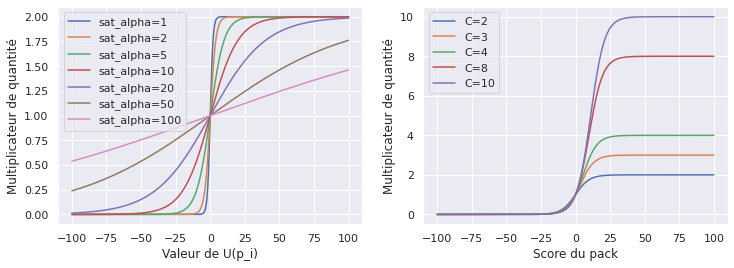

In [18]:
# Exemples de différents paramètres C et sat_alpha
# Définition de la fonction de saturation
def sat(U,alpha,c):
        x = (U)
        y = math.log(c-1)
        return c / (1 + math.exp(-x/alpha+y))

# Affichage de la fonction de saturation selon sat_alpha
fig,axs = plt.subplots(1,2,figsize=(12,4))
for alpha in [1,2,5,10,20,50,100]:
    c=2
    res = np.array(np.zeros(len(np.arange(-100,100,0.01))))
    cpt = 0
    for i in np.arange(-100,100,0.01):
        res[cpt] = sat(i,alpha,c)
        cpt+=1
    axs[0].plot(np.arange(-100,100,0.01),res)
axs[0].legend(("sat_alpha=1","sat_alpha=2","sat_alpha=5","sat_alpha=10","sat_alpha=20","sat_alpha=50","sat_alpha=100") )
axs[0].set_xlabel("Valeur de U(p_i)")
axs[0].set_ylabel("Multiplicateur de quantité")

# Affichage de la fonction de saturation selon C
for c in [2,3,4,8,10]:
    alpha = 5
    res = np.array(np.zeros(len(np.arange(-100,100,0.01))))
    cpt = 0
    for i in np.arange(-100,100,0.01):
        res[cpt] = sat(i,alpha,c)
        cpt+=1
    axs[1].plot(np.arange(-100,100,0.01),res)
axs[1].legend(("C=2","C=3","C=4","C=8","C=10") )
axs[1].set_xlabel("Score du pack")
axs[1].set_ylabel("Multiplicateur de quantité")

Finally, `Phi` corresponds to the intensity of loss aversion. Phi = 0.5 is equivalent to : the negative impact of losing 1€ is 1.5 times stronger than the positive impact of gaining 1€. Phi = 2 would correspond to the same ratio equal to 3 etc..

#### Simulations for different parameters

Here are some examples of parameter changes. We take the category of 8 packs used previously. 

In [25]:
test = generate_pack_categorie("bananas")
abm = SMA([test],300,100)

The environment parameters are passed via the `initialize()` method.
The parameters are price, quality, promophile, sat_alpha, phi, c, inertia

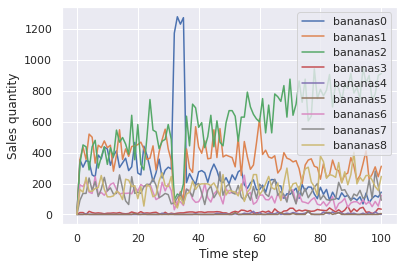

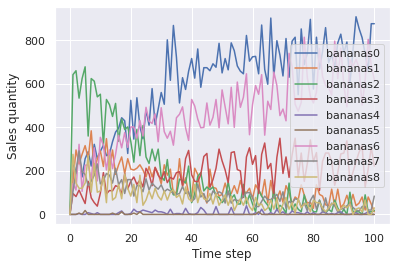

0

In [26]:
abm.initialize(inertia = 0)
abm.makePromo(0,40,(30,34),"bananas","bananas0")
abm.run()
abm.showPacksSales()
abm.initialize(inertia = 10)
abm.makePromo(0,40,(30,34),"bananas","bananas0")
abm.run()
abm.showPacksSales()

In the first figure we see that there is no more loyalty because once the promotion on `Pack0` is over the agents return to their previous habits. Moreover, the agents go to the pack with the best quality/price ratio, there is no more "force of habit" that would keep them from changing product.

In the second figure we see that the promotion has no impact, the sales of the `Pack0` pack do not increase. This means that an agent who is used to a brand is more likely to buy only packs of this brand than a pack on promotion which would offer a price advantage. 

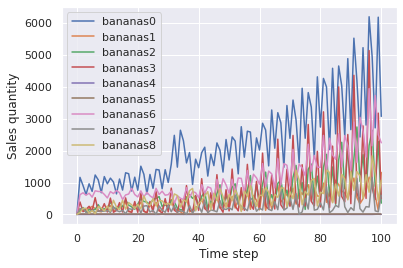

0

In [27]:
abm.initialize(price=10, quality=10, promophile=10, sat_alpha=1, phi=0.3, c = 2, inertia = 10)
abm.makePromo(0,40,(30,34),"bananas","bananas0")
abm.run()
abm.showPacksSales()

A parameter `sat_alpha` that is too small compared to the others induces that a simple loyalty is enough to make the agents buy in larger quantities (calculated in the saturation function). Since the agents rely on their history to determine the quantity of purchase, the number of sales only increases. 

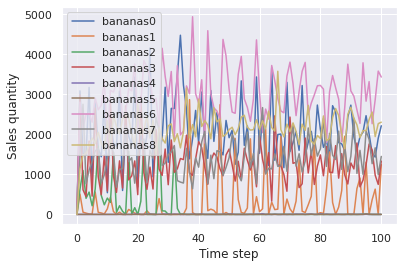

0

In [28]:
abm.initialize(price=2, quality=0, promophile=1, sat_alpha=100, phi=0.3, c = 2, inertia = 1)
abm.makePromo(0,40,(30,34),"bananas","bananas0")
abm.run()
abm.showPacksSales()

As quality no longer has an impact, we observe that some products (the most expensive ones) are no longer purchased at all.

### Conclusion

Through this notebook we have been able to show some of the most interesting simulations and to explain the parameterization of the model. Its strength is that it is adaptive, however some sets of parameters do not reflect reality. There are still different possible simulations showing interesting effects, it is however not possible to integrate everything in the article. These different simulations are available in the jupyter sheet "_BUILDING_".